--------------------------------------------------------------
# Apply Machine Learning Algorithms :


 #### 1) Logistic Regression
 #### 2) Decision Tree Classifier
 #### 3) Random Forest Classifier
 #### 4) Adaboost Classifier
 #### 5) XGBoost Classifier

In [1]:
# Importing libraries and packages:

from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Importing the required packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pickle import dump, load
from keras.utils import np_utils

%matplotlib inline

In [2]:
# Collect data
pickle_dir = 'TFS_Dataset/Pickle/'

In [3]:
# Number of total classes
NUM_CATEGORIES = 43


# Resizing the images to 32x32x3
img_height = 32
img_width = 32
channels = 3

# reshape image size
n_features = 1024  ## 32 * 32 = 1024

## Load Pickle file data


In [4]:
# Load all Training images & label data
fid = open((pickle_dir+'X_train_y_train_gray.pkl'), 'rb')
X_train_gray,y_train_gray = load(fid)
fid.close()

# Load all Testing images & label data
fid = open((pickle_dir+'X_test_y_test_gray.pkl'), 'rb')
X_test_gray,y_test_gray = load(fid)
fid.close()

# Load Traffic sign Classes
fid = open((pickle_dir+'Traffic_sign_Classes.pkl'), 'rb')
traffic_classes = load(fid)
fid.close()

## Summary

In [5]:
print("Number of Training examples =", len(X_train_gray))
print("Number of Testing examples =", len(X_test_gray))
print("Image data shape =", (X_train_gray.shape))
print("Number of classes =", len(traffic_classes))

Number of Training examples = 39209
Number of Testing examples = 12630
Image data shape = (39209, 32, 32)
Number of classes = 43


## Reshape training, testing and validation data


In [6]:
print("X_train_gray shape before reshape : ",X_train_gray.shape)
print("X_test_gray shape before reshape: ",X_test_gray.shape)

X_train_gray shape before reshape :  (39209, 32, 32)
X_test_gray shape before reshape:  (12630, 32, 32)


In [7]:
# building the input vector from the 32x32 pixels
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], n_features)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], n_features)

In [8]:
print("X_train_gray shape after reshape : ",X_train_gray.shape)
print("X_test_gray shape after reshape: ",X_test_gray.shape)


X_train_gray shape after reshape :  (39209, 1024)
X_test_gray shape after reshape:  (12630, 1024)


In [9]:
X_train_gray

array([[ 43,  51,  48, ...,  46,  59,  52],
       [119, 155, 208, ..., 179, 175, 197],
       [123, 176, 160, ...,  38,  39,  39],
       ...,
       [255, 255, 252, ..., 226, 221, 222],
       [109, 128, 202, ...,  46,  49,  46],
       [174, 204, 203, ..., 105, 101, 100]], dtype=uint8)

In [10]:
print("y_train :",y_train_gray.shape)
print("y_test :",y_test_gray.shape)

y_train : (39209,)
y_test : (12630,)


# 1 - Logistic Regression

In [18]:
# import Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [55]:
# import Logistic Regression 
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()
my_logreg.fit(X_train_gray, y_train_gray)

# Prediction on the testing set:
y_predict_lr = my_logreg.predict(X_test_gray)
print(y_predict_lr)

[12 13  1 ...  5  1 38]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy Evaluation:


In [56]:
# display accuracy
score_lr = accuracy_score(y_test_gray, y_predict_lr)

print("Logistic Regression  accuracy: ",score_lr)


Logistic Regression  accuracy:  0.8083927157561361


### Estimating the Probability (likelihood) of happening an Event: 

In [57]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test_gray)

print(y_predict_lr)
print(y_predict_prob_lr[:,1])


[12 13  1 ...  5  1 38]
[2.04915717e-05 2.50406312e-08 9.95299920e-01 ... 9.86042554e-02
 9.50710040e-01 2.35794018e-14]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [64]:
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test_gray, y_predict_prob_lr[:,1], pos_label=1)

print(fpr_lr)
print(tpr_lr)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.67926113e-04
 1.67926113e-04 2.51889169e-04 2.51889169e-04 3.35852225e-04
 3.35852225e-04 4.19815281e-04 4.19815281e-04 6.71704450e-04
 6.71704450e-04 8.39630563e-04 8.39630563e-04 9.23593619e-04
 9.23593619e-04 1.00755668e-03 1.00755668e-03 1.17548279e-03
 1.17548279e-03 1.25944584e-03 1.25944584e-03 1.59529807e-03
 1.59529807e-03 1.76322418e-03 1.76322418e-03 1.93115029e-03
 1.93115029e-03 2.01511335e-03 2.01511335e-03 2.09907641e-03
 2.09907641e-03 2.18303946e-03 2.18303946e-03 2.26700252e-03
 2.26700252e-03 2.35096558e-03 2.35096558e-03 2.43492863e-03
 2.43492863e-03 2.60285474e-03 2.60285474e-03 2.68681780e-03
 2.68681780e-03 2.77078086e-03 2.77078086e-03 2.85474391e-03
 2.85474391e-03 2.93870697e-03 2.93870697e-03 3.02267003e-03
 3.02267003e-03 3.10663308e-03 3.10663308e-03 3.19059614e-03
 3.19059614e-03 3.27455919e-03 3.27455919e-03 3.35852225e-03
 3.35852225e-03 3.44248531e-03 3.44248531e-03 3.52644836e-03
 3.52644836e-03 3.610411

### AUC:

In [65]:
# AUC:
AUC_lr = metrics.auc(fpr_lr, tpr_lr)
print(AUC_lr)

0.9714141944211213


### ROC Curve:

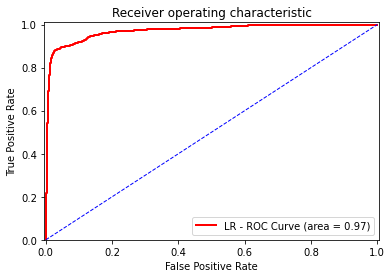

In [66]:
plt.figure()

# Roc Curve:
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='LR - ROC Curve (area = %0.2f)' % AUC_lr)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 2 - Decision Tree Classifier


In [26]:
%%time
# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

my_decisiontree = DecisionTreeClassifier(random_state=2)
my_decisiontree.fit(X_train_gray, y_train_gray)

# Prediction on the testing set:
y_predict_dt = my_decisiontree.predict(X_test_gray)

print(y_predict_dt)

[12  3  1 ...  5  1 38]
CPU times: user 42.8 s, sys: 208 ms, total: 43 s
Wall time: 43.2 s


In [61]:
# display accuracy
score_dt = accuracy_score(y_test_gray, y_predict_dt)

print("Decision Tree Classifier accuracy: ",score_dt)

Decision Tree Classifier accuracy:  0.5716547901821061


### Estimating the Probability (likelihood) of happening an Event: 


In [28]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_dt = my_decisiontree.predict_proba(X_test_gray)

print(y_predict_dt)
print(y_predict_prob_dt[:,1])

[12  3  1 ...  5  1 38]
[0. 0. 1. ... 0. 1. 0.]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [29]:
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test_gray, y_predict_prob_dt[:,1], pos_label=1)

print(fpr_dt)
print("\n")
print(tpr_dt)

[0.         0.02258606 1.        ]


[0.         0.59166667 1.        ]


### AUC:

In [30]:
# AUC:
AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print(AUC_dt)

0.7845403022670026


### ROC Curve:

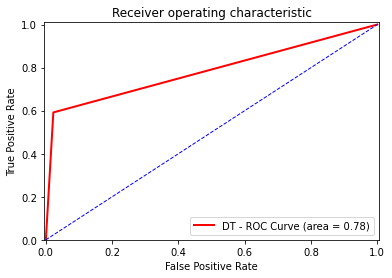

In [31]:
plt.figure()

# Roc Curve:
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='DT - ROC Curve (area = %0.2f)' % AUC_dt)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 3 - Random Forest Classifier

In [32]:
%%time
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train_gray, y_train_gray)

# Prediction on the testing set:
y_predict_rf = my_RandomForest.predict(X_test_gray)

print(y_predict_rf)

[12  1  1 ...  1  2 38]
CPU times: user 26 s, sys: 189 ms, total: 26.2 s
Wall time: 26.2 s


In [62]:
# display accuracy
score_rf = accuracy_score(y_test_gray, y_predict_rf)

print("Random Forest Classifier accuracy: ",score_rf)

Random Forest Classifier accuracy:  0.7304829770387965


### Estimating the Probability (likelihood) of happening an Event: 


In [34]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = my_RandomForest.predict_proba(X_test_gray)

print(y_predict_rf)
print(y_predict_prob_rf[:,1])

[12  1  1 ...  1  2 38]
[0.06896552 0.13793103 0.44827586 ... 0.34482759 0.27586207 0.06896552]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [35]:

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test_gray, y_predict_prob_rf[:,1], pos_label=1)

print(fpr_rf)
print("\n")
print(tpr_rf)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.39630563e-05
 4.19815281e-04 5.03778338e-04 1.09151973e-03 2.60285474e-03
 5.45759866e-03 9.99160369e-03 1.79680940e-02 3.04785894e-02
 4.82787573e-02 8.16120907e-02 1.42653233e-01 2.54072208e-01
 4.79680940e-01 1.00000000e+00]


[0.         0.00416667 0.01805556 0.02638889 0.04722222 0.06111111
 0.09027778 0.1125     0.14444444 0.17777778 0.21527778 0.25
 0.30555556 0.35833333 0.40833333 0.46527778 0.51111111 0.575
 0.61666667 0.67777778 0.71388889 0.75555556 0.79444444 0.84583333
 0.88472222 0.92638889 0.95138889 0.97222222 0.99027778 1.        ]


### AUC:

In [36]:
# AUC:
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print(AUC_rf)

0.9725641967534284


### ROC Curve:

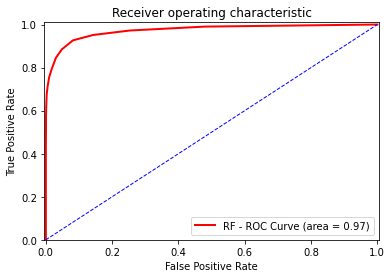

In [37]:
plt.figure()

# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='RF - ROC Curve (area = %0.2f)' % AUC_rf)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 4 - Adaboost Classifier


In [38]:
%%time
# import Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train_gray,y_train_gray)

# Prediction on the testing set:
y_predict_ad = my_AdaBoost.predict(X_test_gray)

print(y_predict_ad)

[12 14  2 ... 14 38 13]
CPU times: user 1min 9s, sys: 2.61 s, total: 1min 12s
Wall time: 1min 12s


In [63]:
# display accuracy
score_ad = accuracy_score(y_test_gray, y_predict_ad)

print("AdaBoost Classifier accuracy: ",score_ad)

AdaBoost Classifier accuracy:  0.21464766429136975


### Estimating the Probability (likelihood) of happening an Event: 


In [40]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ad = my_AdaBoost.predict_proba(X_test_gray)

print(y_predict_ad)
print(y_predict_prob_ad[:,1])

[12 14  2 ... 14 38 13]
[0.02609871 0.03845122 0.02706622 ... 0.03140738 0.02625194 0.04771039]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [41]:
fpr_ad, tpr_ad, thresholds_ad = metrics.roc_curve(y_test_gray, y_predict_prob_ad[:,1], pos_label=1)

print(fpr_ad)
print("\n")
print(tpr_ad)

[0.00000000e+00 8.39630563e-05 5.03778338e-04 ... 9.99580185e-01
 9.99916037e-01 1.00000000e+00]


[0. 0. 0. ... 1. 1. 1.]


### AUC:

In [42]:
# AUC:
AUC_ad = metrics.auc(fpr_ad, tpr_ad)
print(AUC_ad)

0.6986715761731505


### ROC Curve:

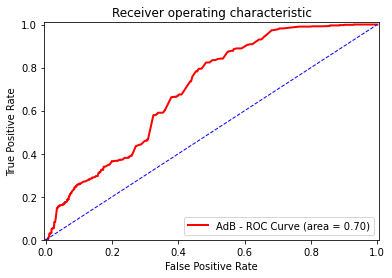

In [43]:
plt.figure()

# Roc Curve:
plt.plot(fpr_ad, tpr_ad, color='red', lw=2, label='AdB - ROC Curve (area = %0.2f)' % AUC_ad)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# 5 - XGBoost Classifier


In [44]:
%%time
# import XGBoost Classifier
from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)
my_XGBoost.fit(X_train_gray,y_train_gray)

# Prediction on the testing set:
y_predict_xg = my_XGBoost.predict(X_test_gray)

print(y_predict_xg)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12 18  1 ...  1  1 18]
CPU times: user 1h 25min 5s, sys: 19.1 s, total: 1h 25min 24s
Wall time: 7min 45s


In [45]:
# display accuracy
score_xg = accuracy_score(y_test_gray, y_predict_xg)

print("AdaBoost Classifier accuracy: ",score_xg)

AdaBoost Classifier : 0.7418844022169437


### Estimating the Probability (likelihood) of happening an Event: 


In [46]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_xg = my_XGBoost.predict_proba(X_test_gray)

print(y_predict_xg)
print(y_predict_prob_xg[:,1])

[12 18  1 ...  1  1 18]
[0.02029403 0.2915     0.9990926  ... 0.97540945 0.9689424  0.0384218 ]


### True Positive Rate (TPR) and False Positive Rate (FPR):

In [47]:

fpr_xg, tpr_xg, thresholds_xg = metrics.roc_curve(y_test_gray, y_predict_prob_xg[:,1], pos_label=1)

print(fpr_xg)
print("\n")
print(tpr_xg)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.39630563e-05
 8.39630563e-05 8.39630563e-05 8.39630563e-05 1.67926113e-04
 1.67926113e-04 2.51889169e-04 2.51889169e-04 3.35852225e-04
 3.35852225e-04 4.19815281e-04 4.19815281e-04 5.03778338e-04
 5.03778338e-04 5.87741394e-04 5.87741394e-04 7.55667506e-04
 7.55667506e-04 8.39630563e-04 8.39630563e-04 9.23593619e-04
 9.23593619e-04 1.00755668e-03 1.00755668e-03 1.17548279e-03
 1.17548279e-03 1.25944584e-03 1.25944584e-03 1.34340890e-03
 1.34340890e-03 1.51133501e-03 1.51133501e-03 1.59529807e-03
 1.59529807e-03 1.84718724e-03 1.84718724e-03 1.93115029e-03
 1.93115029e-03 2.01511335e-03 2.01511335e-03 2.09907641e-03
 2.09907641e-03 2.18303946e-03 2.18303946e-03 2.26700252e-03
 2.26700252e-03 2.35096558e-03 2.35096558e-03 2.43492863e-03
 2.43492863e-03 2.51889169e-03 2.51889169e-03 2.60285474e-03
 2.60285474e-03 2.77078086e-03 2.77078086e-03 2.85474391e-03
 2.85474391e-03 2.938706

 0.99861111 0.99861111 1.         1.        ]


### AUC:

In [48]:
# AUC:
AUC_xg = metrics.auc(fpr_xg, tpr_xg)
print(AUC_xg)

0.9832802733463942


### ROC Curve:

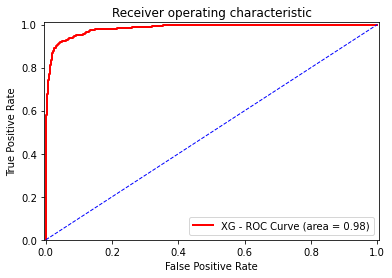

In [49]:
plt.figure()

# Roc Curve:
plt.plot(fpr_xg, tpr_xg, color='red', lw=2, label='XG - ROC Curve (area = %0.2f)' % AUC_xg)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#  Comparing the ROC Curves:


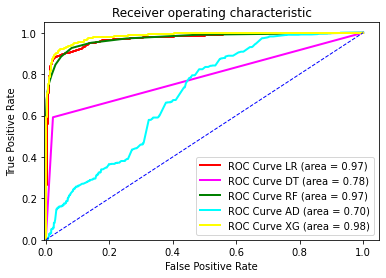

In [69]:
plt.figure()

# Roc Curve: Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='ROC Curve LR (area = %0.2f)' % AUC_lr)

# Roc Curve: Decision Tree Classifier
plt.plot(fpr_dt, tpr_dt, color='magenta', lw=2, label='ROC Curve DT (area = %0.2f)' % AUC_dt)

# Roc Curve: Random Forest Classifier
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Curve RF (area = %0.2f)' % AUC_rf)

# Roc Curve: Adaboost Classifier
plt.plot(fpr_ad, tpr_ad, color='cyan', lw=2, label='ROC Curve AD (area = %0.2f)' % AUC_ad)

# Roc Curve: XGBoost Classifier
plt.plot(fpr_xg, tpr_xg, color='yellow', lw=2, label='ROC Curve XG (area = %0.2f)' % AUC_xg)


# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.05])
plt.ylim([0.0, 1.05])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

#   
# Cross-Validation

## Combine training and testing data :


In [11]:
X_new = np.concatenate((X_train_gray, X_test_gray))
y_new = np.concatenate((y_train_gray, y_test_gray))

In [12]:
X_new

array([[ 43,  51,  48, ...,  46,  59,  52],
       [119, 155, 208, ..., 179, 175, 197],
       [123, 176, 160, ...,  38,  39,  39],
       ...,
       [100,  87, 156, ..., 129, 124,  80],
       [ 49,  39,  40, ...,  41,  41,  39],
       [ 69,  82,  69, ...,  59, 172, 202]], dtype=uint8)

In [13]:
y_new

array([ 6, 33, 17, ...,  4,  1, 38])

In [14]:
print("X:",X_new.shape)
print("y:",y_new.shape)

X: (51839, 1024)
y: (51839,)


### Applying 10-fold Cross Validation for "Decision Tree" classifier:


In [17]:
%%time

from sklearn.model_selection import cross_val_score

my_decisiontree = DecisionTreeClassifier(random_state=1)
accuracy_list = cross_val_score(my_decisiontree,X_new, y_new, cv=10, scoring='accuracy')

print('Cross-Validation Accuracy: ',accuracy_list,'\n')

Cross-Validation Accuracy:  [0.78125    0.78279321 0.77353395 0.77970679 0.77700617 0.76292438
 0.77565586 0.76658951 0.75096451 0.7426201 ] 

CPU times: user 8min 4s, sys: 2.04 s, total: 8min 6s
Wall time: 8min 8s


In [19]:
# display accuracy
accuracy_cv = accuracy_list.mean()

print("Cross-Validation Accuracy for Decision Tree: ",accuracy_cv)

Cross-Validation Accuracy for Decision Tree:  0.7693044486902814


### Applying 10-fold Cross Validation for "Logistic Regression" classifier:


In [20]:
%%time

my_logreg_cv = LogisticRegression()
accuracy_list_cv_lr = cross_val_score(my_logreg_cv,X_new, y_new, cv=10, scoring='accuracy')

print('\n','Cross-Validation Accuracy: ',accuracy_list_cv_lr)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


 Cross-Validation Accuracy:  [0.87789352 0.88908179 0.88483796 0.88715278 0.88020833 0.88329475
 0.88869599 0.88290895 0.85185185 0.85491028]
CPU times: user 42min 45s, sys: 4min 29s, total: 47min 15s
Wall time: 6min 31s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# display accuracy
accuracy_cv_lr = accuracy_list_cv_lr.mean()

print("Cross-Validation Accuracy for Logistic Regression: ",accuracy_cv)

Cross-Validation Accuracy for Logistic Regression:  0.7693044486902814
